In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load
import os
import mahotas as mh


In [4]:
c41_raw = load('c41_cell_raw.hdf5')
epec_raw = load('epec_cell_raw.hdf5')

In [5]:
c41_binary = c41_raw.copy()
res = c41_binary.optimize_mp()

In [6]:
epec_binary = epec_raw.copy()
res_epec = epec_binary.optimize_mp()

In [42]:
obj_c41 = np.array([r.objective_value for r in res])
a_c41 = np.array([c.data.binary_img.sum() for c in c41_binary])
f =  obj_c41 / a_c41

<IPython.core.display.Javascript object>


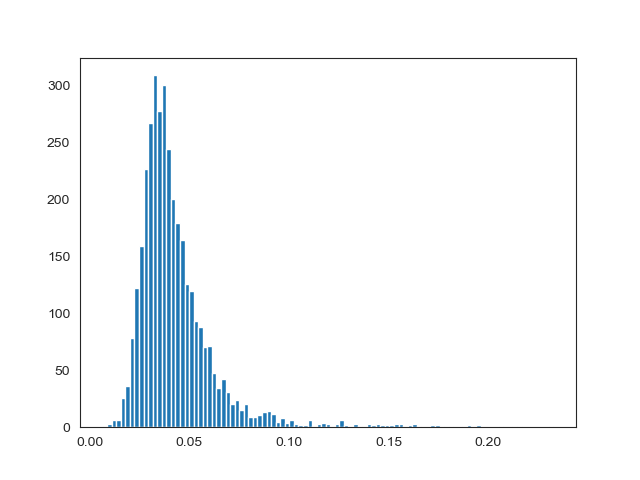

In [43]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


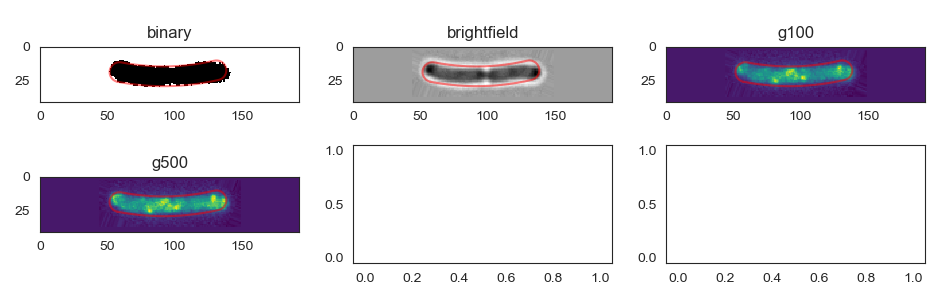

In [44]:
b = f < 0.08
aicp = AutoIterCellPlot(c41_binary[b])
aicp.plot()

In [45]:
c41_selected = c41_binary[b]

In [46]:
save('c41_binary_opt.hdf5', c41_selected)

In [23]:
obj_epec = np.array([r.objective_value for r in res_epec])
a_epec = np.array([c.data.binary_img.sum() for c in epec_binary])
f =  obj_epec / a_epec

<IPython.core.display.Javascript object>


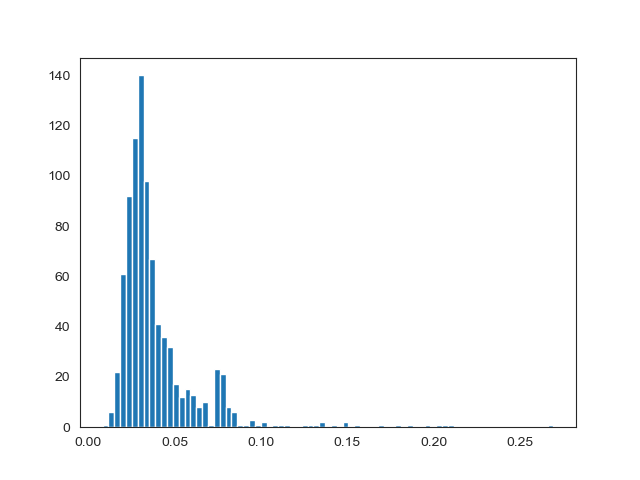

In [25]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


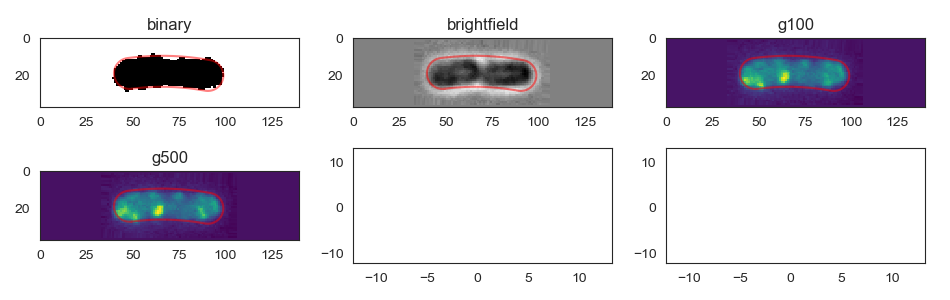

In [38]:
b = f < 0.07
aicp = AutoIterCellPlot(epec_binary[b])
aicp.plot()

In [39]:
epec_selected = epec_binary[b]

In [41]:
save('epec_binary_opt.hdf5', epec_selected)